In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('heart.csv', sep=',')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Encoding

In [4]:
from encoder import createOneHot

# categorical columns of heart df except bool type ones
encode_columns = ['cp', 'restecg', 'slope', 'thal']

encoded_df = createOneHot(df, encode_columns)
encoded_df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,1,0,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,...,0,1,0,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,...,0,1,0,0,1,0,0,0,0,1


### Train-test seperation of data

In [5]:
from train_test_split import stratified_train_test_split

X = encoded_df.drop(columns='target')
y = encoded_df.target

X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, split=0.2)

print(f'Distribution in y: \n{y.value_counts()}\n')
print(f'Distribution in y train: \n{y_train.value_counts()}\n')
print(f'Distribution in y test: \n{y_test.value_counts()}\n')

Distribution in y: 
1    165
0    138
Name: target, dtype: int64

Distribution in y train: 
1    132
0    111
Name: target, dtype: int64

Distribution in y test: 
1    33
0    27
Name: target, dtype: int64



### Standard scaling

In [6]:
from scaler import Standardization

scaler = Standardization()

numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_train_scaled = scaler.fit_transform(X_train, numerical_columns)
X_test_scaled = scaler.fit_transform(X_test, numerical_columns)

In [7]:
X_train_scaled

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.982641,0.731358,-0.216520,0.024737,1.038981,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.887597,-0.121152,0.102128,1.648144,2.064945,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.446022,-0.121152,-0.760095,0.990006,0.269509,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0.209884,-0.689492,-0.160288,1.253261,-0.243473,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.320278,-0.689492,2.051502,0.595123,-0.414467,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.320278,0.447188,-0.066568,-1.159912,-0.756455,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
239,-1.004447,-1.257832,0.364543,-0.765029,0.098515,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
240,1.534610,0.674524,-0.966279,-0.370146,1.979448,1,1,0,2,1,...,0,1,0,0,1,0,0,0,0,1
241,0.320278,-0.121152,-2.128406,-1.510919,0.098515,1,0,1,1,1,...,0,1,0,0,1,0,0,0,0,1


In [8]:
X_test_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.975090,0.774277,2.849413,0.375788,0.101766,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,1.200545,2.941770,-0.463166,0.296535,-0.445039,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-2.744907,0.051779,-0.919389,2.158963,-0.991844,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0.524181,-1.754466,-0.205301,0.256909,-0.445039,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.073273,1.496775,-0.363987,0.692797,0.466303,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


### Multi Layer Perceptron (MLP)

In [14]:
from NeuralNetwork import MLP

input_size = 23
hidden_size = 5
output_size = 1

model = MLP(input_size, hidden_size, output_size)

X_train_mlp = np.array(X_train_scaled).T
y_train_mlp = np.array(y_train).T

model.train(X_train_mlp, y_train_mlp, learning_rate=0.01, epochs=3000, batch_size=4)


Epoch: 10
  Loss: 0.9674881317583234

Epoch: 20
  Loss: 0.6796694906199847

Epoch: 30
  Loss: 0.5719381961100992

Epoch: 40
  Loss: 0.5252591470852009

Epoch: 50
  Loss: 0.4934807532678591

Epoch: 60
  Loss: 0.47592676242074466

Epoch: 70
  Loss: 0.464117141753307

Epoch: 80
  Loss: 0.45290801783355694

Epoch: 90
  Loss: 0.4406642984767455

Epoch: 100
  Loss: 0.42591404255720205

Epoch: 110
  Loss: 0.41530945592774965

Epoch: 120
  Loss: 0.4081955490411591

Epoch: 130
  Loss: 0.4030356865459636

Epoch: 140
  Loss: 0.39814590651555143

Epoch: 150
  Loss: 0.392776751386721

Epoch: 160
  Loss: 0.38830218855906284

Epoch: 170
  Loss: 0.3836027763132308

Epoch: 180
  Loss: 0.3779213961050179

Epoch: 190
  Loss: 0.3713067767969627

Epoch: 200
  Loss: 0.36665121356978664

Epoch: 210
  Loss: 0.36303310642685915

Epoch: 220
  Loss: 0.35950072024677626

Epoch: 230
  Loss: 0.354501039167583

Epoch: 240
  Loss: 0.35008499100921653

Epoch: 250
  Loss: 0.34691423574593083

Epoch: 260
  Loss: 0.3443

##### Prediction on test data using MLP model

In [15]:
X_test_mlp = np.array(X_test_scaled).T
y_test_mlp = np.array(y_test).T


# predict y values based on y_test
y_predict = model.predict(X_test_mlp)

##### Evaluate MLP

In [16]:
from evaluator import ConfusionMatrix
    
confusion = ConfusionMatrix()

mlp_precision_value, mlp_accuracy_value, mlp_sensivity_value, mlp_specifity_value = confusion.getEvaluation(y_test_mlp, y_predict)

print(f'The precition of the MLP model: {mlp_precision_value}')
print(f'The accuracy of the MLP model: {mlp_accuracy_value}')
print(f'The sensivity of the MLP model: {mlp_sensivity_value}')
print(f'The specifity of the MLP model: {mlp_specifity_value}')

The precition of the MLP model: 0.853
The accuracy of the MLP model: 0.85
The sensivity of the MLP model: 0.879
The specifity of the MLP model: 1


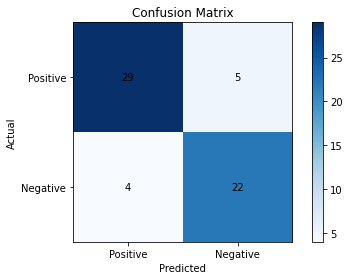

In [17]:
confusion.getGraph()